# Supervised Learning am Beispiel der KNN-Klassifikation

In [1]:
# import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
# wenn der Hintergrund der Plots schwarz sein soll, dann die folgende Zeile auskommentieren
#plt.style.use('dark_background')

In [2]:
# Load the Iris dataset
iris = load_iris()

# print feature names (variable names)
print(iris['feature_names'])

# create DateFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

#print number of rows 
print('Number of Rows:',len(iris_df))



['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Number of Rows: 150


In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

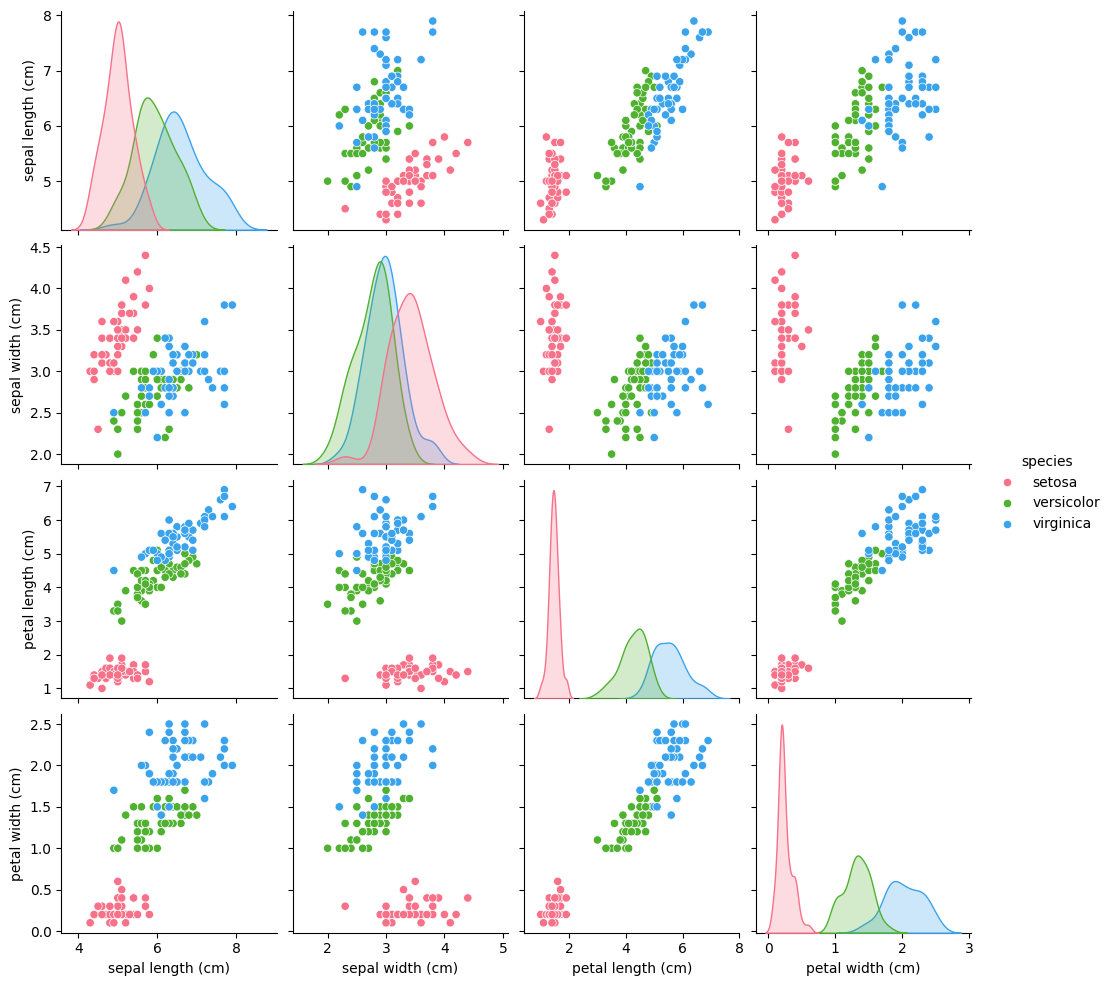

In [4]:
# Pairplot to visualize the relationships between features for each species
sns.pairplot(iris_df, hue="species", palette='husl')
plt.show()

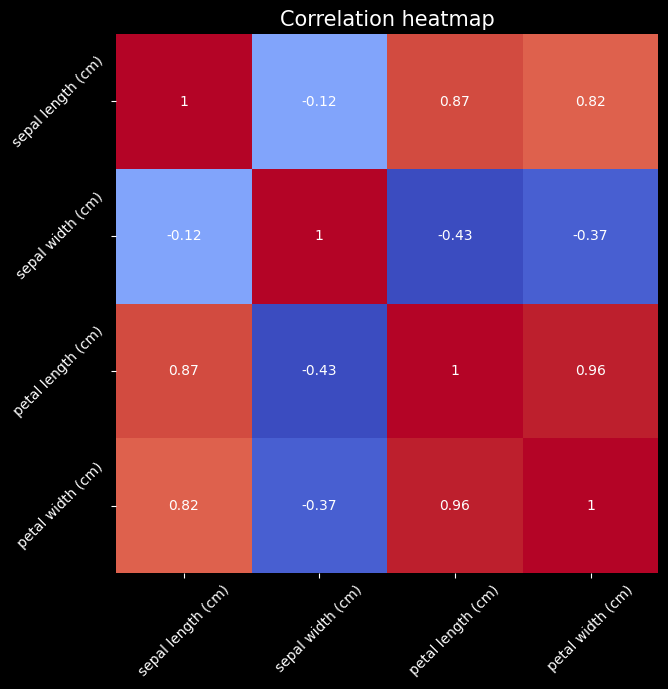

In [5]:
# Correlation plot for Iris dataset
fig, axes = plt.subplots(figsize=(7,7))
sns.heatmap(iris_df.iloc[:,:4].corr(), annot=True, cbar=False, cmap='coolwarm', ax=axes)
axes.tick_params(labelrotation=45, colors='white')
plt.title('Correlation heatmap', fontsize=15, color='white')

# Adjust the face and edge color of the figure and axes to ensure transparency
fig.patch.set_facecolor('black')
axes.set_facecolor('black')



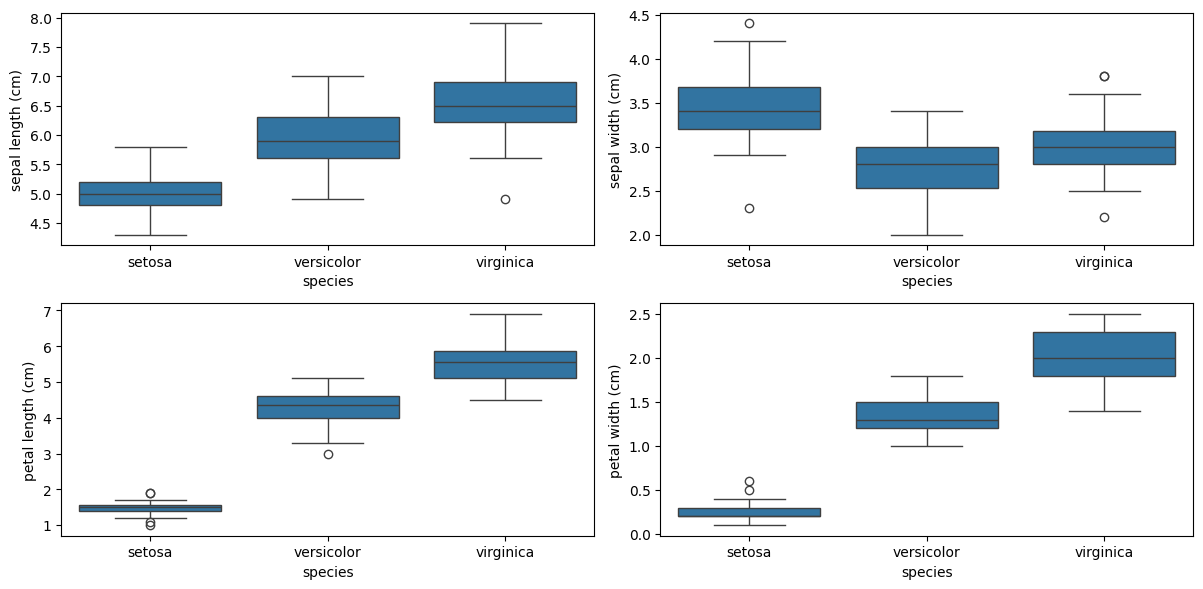

In [6]:
# Boxplot to visualize the distribution of each feature for each species
plt.figure(figsize=(12, 6))
# enumerate over 
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=iris_df)
plt.tight_layout()

plt.show()


In [7]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = iris.data, iris.target

# Inspecting the dataset's features and target names
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

# Splitting the data into training and test datasets
# 42 - The Answer to Life, the Universe, and Everything, 
# including our random state!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

# Creating the KNN (k-nearest neighbors) classification model
knn = KNeighborsClassifier(n_neighbors=3,weights='uniform')

# Training the model with the training data
knn.fit(X_train, y_train)

# Testing the model with the test data
accuracy = knn.score(X_test, y_test)
print(f'Model accuracy: {accuracy * 100}%')

# Making a prediction with the model
sample_data = X_test[0].reshape(1, -1)
prediction = knn.predict(sample_data)
print(f'Predicted Iris species: {iris.target_names[prediction][0]}')

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Model accuracy: 100.0%
Predicted Iris species: versicolor


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



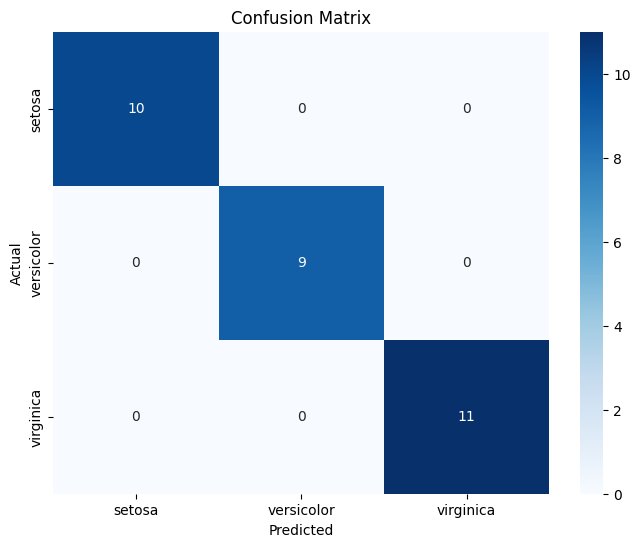

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
#plt.style.use('default')

# Predictions for the test dataset
predictions = knn.predict(X_test)

# Generating a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generating a classification report
class_report = classification_report(y_test, predictions, 
                                     target_names=iris.target_names)
print("\nClassification Report:")
print(class_report)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

plt.show()

In [9]:
unique_values, counts = np.unique(y_test, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"{value} occurs {count} times")

0 occurs 10 times
1 occurs 9 times
2 occurs 11 times
